In [1]:
# -*- coding: utf-8 -*-
"""
Author : Ang Ming Liang

This code is based on https://github.com/probml/pmtk3/blob/master/demos/sliceSamplingDemo1d.m
"""


import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml

from probml_utils.mcmc_utils import slice_sample
import seaborn as sns

In [2]:
# import os
# os.environ["LATEXIFY"] = ""
# os.environ["FIG_DIR"] = "figures"

In [3]:
pml.latexify(width_scale_factor=2, fig_height=1.5)

/home/patel_karm/anaconda3/envs/py3713_2/lib/python3.7/site-packages/probml_utils/plotting.py:26: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


100%|██████████| 4000/4000 [00:00<00:00, 8117.06it/s]
/home/patel_karm/anaconda3/envs/py3713_2/lib/python3.7/site-packages/probml_utils/plotting.py:80: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


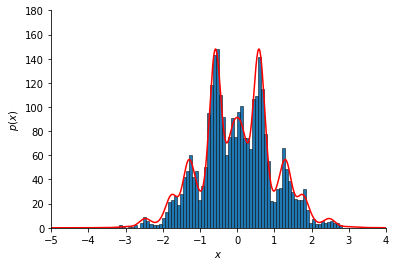

In [4]:
seed = 123
rng = np.random.default_rng(seed)


def pdf(x):
    return np.exp(-(x**2) / 2) * (1 + (np.sin(3 * x)) ** 2) * (1 + (np.cos(5 * x)) ** 2)


def logpdf(x):
    return np.log(pdf(x))


x = np.array([1.0])
out = slice_sample(x, logpdf, iters=4000, sigma=5, burnin=1000, rng=rng)

fig, ax = plt.subplots()

# Set dim of the figure
ax.set_xlim(-5, 4)
ax.set_ylim(0, 180)

# Plt histogram
bin = ax.hist(out[0], bins=75, ec="black", lw=0.5)

xd = bin[1]  # Get bins size
binwidth = xd[1] - xd[0]  # Finds the width of each bin

y = 563.98 * binwidth * pdf(np.linspace(-5, 4, 1000))
ax.plot(np.linspace(-5, 4, 1000), y, "r")
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")

sns.despine()
pml.savefig("sliceSamplingDemo1d.pdf")